# NLP Analysis

# Introduction

The next notebook contains an analysis pipeline given a certain text(in this case, Haruki Murakami's article) using Hugging Face's models for transformers.
## Table of Contents

* Part 1
  * [NER](#ner-id)
    * [Principal Output](#nerout-id)
    * [Insights](#neri-id)
  * [Key elements and themes](#k-id)
    * [Plot Output](#kplot-id)
    * [Principal Output](#kout-id)
    * [Insights](#ki-id)
  * [Recommendation system](#rec-id)
    * [Principal Output](#recout-id)
    * [Insights](#reci-id)
* Part 2
  * [Sentiment Analysis](#sen-id)
    * [Plot Output](#senplot-id)
    * [Principal Output](#senout-id)
    * [Insights](#seni-ud)
* Part 3
  * [Characters](#char-id)
    * [Principal Output](#charout-id)
    * [Insights](#chari-id)
* Part 4
  * [Question Generation](#q-id)
    * [Principal Output](#qout-id)
    * [Insights](#qi-id)
* [Conclusion & Next Steps](#conclusion-id)


In [ ]:
# Install transformers dependencies(for Google Colab, if not, comment this line and install dependencies into venv)
!pip install transformers[sentencepiece] sentence-transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=fb7639a52c4d12716085ac4848628f03d881e0ae4ba5652321dd91bf486d9e20
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from transformers import (
    AutoTokenizer,
    AutoModelForTokenClassification,
    TokenClassificationPipeline,
    PegasusTokenizer,
    PegasusForConditionalGeneration,
    BertTokenizer,
    TFBertModel,
    AutoModelForSequenceClassification,
    T5ForConditionalGeneration,
    AutoModelForQuestionAnswering
)
from sentence_transformers import SentenceTransformer
from transformers import pipeline
import torch

import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [ ]:
# In this cell, important variables are defined
# for convenient testing

# NER_MODEL = "dslim/bert-base-NER"
NER_MODEL = "Babelscape/wikineural-multilingual-ner"
POS_MODEL = "QCRI/bert-base-multilingual-cased-pos-english"
ZERO_SHOT_MODEL = "facebook/bart-large-mnli"
# SUMMARIZATION_MODEL = "pszemraj/bigbird-pegasus-large-K-booksum"
SUMMARIZATION_MODEL = "facebook/bart-large-cnn"
EMBEDDINGS_MODEL = "sentence-transformers/all-mpnet-base-v2"
KEY_PHRASE_EXTRACTION_MODEL = "ml6team/keyphrase-extraction-kbir-inspec"
SENTIMENT_ANALYSIS_MODEL = "lxyuan/distilbert-base-multilingual-cased-sentiments-student"
QUESTION_GENERATION_MODEL = "valhalla/t5-base-e2e-qg"
QUESTION_ANSWERING_MODEL = "ProfHuseyin/bert-english-fine-tuning-question-answering"

# list of possible article themes
THEMES_LIST = [
    "justice/injustice",
    "loyalty",
    "wellness",
    "morale",
    "simplicity",
    "struggle",
    "love",
    "family",
    "live and death",
    "power",
    "freedom",
    "success",
]

# Article title
title = "I Want to Open a Window in Their Souls: Haruki Murakami on the Power of Writing Simply."
# Article URL
url = "https://www.theguardian.com/books/2022/nov/05/i-want-to-open-a-window-in-their-souls-haruki-murakami-on-the-power-of-writing-simply"
# Full article
example = """
I Want to Open a Window in Their Souls: Haruki Murakami on the Power of Writing Simply.

My first novel, Hear the Wind Sing, published in 1979, is fewer than 200 pages long. Yet it took many months and much effort to complete. Part of the reason, of course, was the limited time I had to work on it. I ran a jazz cafe, and I spent my 20s labouring from morning to night to pay off debts. But the real problem was that I hadn’t a clue how to write a novel. To tell the truth, although I had been absorbed in reading all kinds of stuff – my favourites being translations of Russian novels and English-language paperbacks – I had never read modern Japanese novels (of the “serious” variety) in any concerted way. Thus I had no idea what kind of Japanese literature was being read at the time or how I should write fiction in Japanese.

For several months, I operated on pure guesswork, adopting what seemed to be a likely style and running with it, but when I read through the result I was far from impressed. “Good grief,” I moaned, “this is hopeless.” What I had written seemed to fulfil the formal requirements of a novel, yet it was rather boring and, as a whole, left me cold.

In retrospect, it was only natural that I was unable to produce a good novel. It was a big mistake to assume that a guy like me who had never written anything in his life could spin out something brilliant right off the bat. Maybe it had been a mistake to try to write something “novelistic” in the first place. “Give up trying to create something sophisticated,” I told myself. “Why not forget all those prescriptive ideas about ‘the novel’ and ‘literature’ and set down your feelings and thoughts as they come to you, freely, in a way that you like?”

While it was easy to talk about setting down one’s impressions freely, though, actually doing it wasn’t that simple. To make a fresh start, the first thing I had to do was ditch my stack of manuscript paper and my fountain pen. As long as they were sitting in front of me, what I was doing felt like “literature”. In their place, I pulled out my old Olivetti typewriter from the closet. Then, as an experiment, I decided to write the opening of my novel in English. What the hell, I figured. If I was going to do something unorthodox, why not go all the way?

Needless to say, my ability in English composition didn’t amount to much. My vocabulary was severely limited, as was my command of English syntax. I could only write in short, simple sentences. Which meant that, however complex and numerous the thoughts running around in my head, I couldn’t even attempt to set them down as they came to me. The language had to be simple, my ideas expressed in an easy-to-understand way, the descriptions stripped of all extraneous fat, the form made compact, and everything arranged to fit a container of limited size. The result was a rough, uncultivated kind of prose. As I struggled to express myself in that fashion, however, a distinctive rhythm began to take shape.

I was born and raised in Japan, so the vocabulary and patterns of Japanese – in short, the language’s contents – had filled the system that was me to bursting. When I sought to put my thoughts and feelings into words, those contents began to swirl like mad, and the system sometimes crashed. Writing in a foreign language, with all the limitations that it entailed, removed this obstacle. It also led me to the realisation that I could express my thoughts and feelings with a limited set of words and grammatical structures, as long as I combined them effectively and linked them together in a skilful manner. Ultimately, I learned that there was no need for a lot of difficult words – I didn’t have to try to impress people with beautiful turns of phrase.

Much later, I found out that the writer Ágota Kristóf had written a number of wonderful novels in a style that had a very similar effect. Kristóf was a Hungarian citizen who left Hungary in 1956 during the upheaval there for Switzerland, where she began to write in French. She did so partly out of necessity, since there was no way she could make a living writing novels in Hungarian. Yet it was through writing in a foreign language that she succeeded in developing a style that was new and uniquely hers. It featured a strong rhythm based on short sentences, diction that was never roundabout but always straightforward, and description that was to the point and free of emotional baggage. Her novels were cloaked in an air of mystery hinting at important matters hidden beneath the surface. Later, when I first encountered her work, it made me feel quite nostalgic, although her literary inclinations are obviously different from mine.

Having discovered the curious effect of composing in a foreign language, thereby acquiring a creative rhythm distinctly my own, I returned my Olivetti to the closet and once more pulled out my sheaf of manuscript paper and my fountain pen. Then I sat down and “translated” the chapter or so that I had written in English into Japanese. Well, “transplanted” might be more accurate, since it wasn’t a verbatim translation. In the process, inevitably, a new style of Japanese emerged. The style that became mine, one that I had discovered. “Now I get it,” I thought. “This is how I should be doing it.” It was a moment of true clarity.

I rewrote the “rather boring” novel I had just finished from top to bottom in the new style that I had just developed. Although the storyline remained more or less intact, the mode of expression was entirely different. Different, too, was its impact on the reader. It was, of course, the short novel Hear the Wind Sing. I wasn’t entirely satisfied with the way it turned out. When I reread it, I found it immature and riddled with faults. Only 20-30% of what I was trying to say came across. Yet it was my first novel, and I had managed to write in a form that somehow worked, so I was left with the feeling that I had taken a big first step.

Writing in my new style felt more like performing music than composing literature, a feeling that stays with me today. It was as if the words were coming through my body instead of from my head. Sustaining the rhythm, finding the coolest chords, trusting in the power of improvisation – it was tremendously exciting. When I sat down at the kitchen table each night and went back to work on my novel (if that’s what it was) using my new style, I felt like I was holding a new, cutting-edge tool in my hands. Boy oh boy, was it fun! And it filled the spiritual void that had loomed with the approach of my 30th birthday.

From the outset, I had a pretty clear idea of the novels I wanted to create. It seems that I discovered my “original” voice and style, not by adding to what I already knew but subtracting from it. Think how many things we pick up in the course of living. Whether we choose to call it information overload or excess baggage, we have that multitude of options to choose from, so that when we try to express ourselves creatively, all those choices collide with each other and we shut down, like a stalled engine. We become paralysed. Our best recourse is to clear out our information system by chucking all that is unnecessary into the bin, allowing our mind to move freely again.

How, then, can we distinguish between those contents that are crucial, those that are less necessary, and those that are entirely unnecessary?

One rule of thumb is to ask yourself, “Am I having a good time doing this?” If you’re not enjoying yourself when you’re engaged in what seems important to you, if you can’t find spontaneous pleasure and joy in it, then there’s likely something wrong. When that happens, you have to go back to the beginning and start discarding any extraneous parts or unnatural elements.

That can be a lot harder than it sounds.

Right after Hear the Wind Sing won a Japanese literary prize for new writers, a high-school classmate of mine stopped by my jazz cafe to offer his comments on my novel. “If something that simple can make it, I could write a novel, too,” he sniffed, and left. I was a little put out, of course, but I also knew what he meant. “The guy may not be entirely off the mark,” I thought. “Perhaps anybody could turn out something as good.” All I had done was sit down and riff on whatever came into my head. There were no complicated words, no elaborate phrases, no elegant style. I had just thrown it together as I went along. If that classmate of mine did go home and write a novel, however, I never heard about it. Maybe he figured there was no need for him to write in a world where novels as half-baked as mine could pass muster. If so, it probably showed good judgment on his part.

Looking back, however, it strikes me that for an aspiring writer, writing “something that simple” may not be so simple. It’s easy enough to think and talk about ridding your mind of unnecessary things, but actually doing it is hard. I think that I was able to pull it off without too much fuss because I had never been obsessed by the idea of being a writer, so I was not hindered by that ambition.

If there is indeed something original about my novels, I think it springs from the principle of freedom. I had just turned 29 when, for no particular reason, I thought, “I feel like writing a novel!” I had never planned to be a writer and had never given serious thought to what sort of novel I should be writing, which meant that I was under no particular constraints. I just wanted to write something that reflected what I was feeling at the time. There was no need to feel self-conscious. In fact, writing was fun – it let me feel free and natural.

I think (or hope) that free and natural sensibility lies at the heart of my novels. That is what has spurred me to write. My engine, as it were. It is my belief that a rich, spontaneous joy lies at the root of all creative expression. What is originality, after all, but the shape that results from the natural impulse to communicate to others that feeling of freedom, that unconstrained joy?

Perhaps pure impulse brings with it its own form and style in a natural, involuntary way. Form and style are, in that sense, far from artificial. A brilliant person may use every ounce of his intelligence to develop form and style, may diagram every step, but if he lacks that natural impulse he is likely to fail or, if not fail, produce something that will not last. It will be like a plant whose roots are not firmly set in the earth: if there is too little rain it will lose its vitality and wither, while if it rains too hard it will be swept away with the topsoil.

This is purely my opinion, but if you want to express yourself as freely as you can, it’s probably best not to start out by asking “What am I seeking?” Rather, it’s better to ask “Who would I be if I weren’t seeking anything?” and then try to visualise that aspect of yourself. Asking “What am I seeking?” invariably leads you to ponder heavy issues. The heavier that discussion gets, the farther freedom retreats, and the slower your footwork becomes. The slower your footwork, the less lively your prose.

When that happens, your writing won’t charm anyone – possibly even you.

The you who is not seeking anything, by contrast, is as light and free as a butterfly. All you have to do is uncup your hands and let it soar. Your words will flow effortlessly. People normally don’t concern themselves with self-expression – they just live their lives. Yet, despite that, you want to say something. Perhaps it is in the natural context of “despite that” where we unexpectedly catch sight of something essential about ourselves.

I have been writing fiction for more than 40 years; yet I have never experienced what is commonly known as “writer’s block”. Wanting to write but being unable to is unknown to me. That may make it sound as if I am overflowing with talent, but the actual reason is much simpler: I never write unless I really want to, unless the desire to write is overwhelming. When I feel that desire, I sit down and set to work. When I don’t feel it, I usually turn to translating from English. Since translation is essentially a technical operation, I can pursue it on a daily basis, quite separate from my creative desire; yet at the same time it is a good way to hone my writing skills. If I am in the mood, I may also turn to writing essays. “What the heck,” I defiantly tell myself as I peck away at those other projects. “Not writing novels isn’t going to kill me.”

After a while, however, the desire to write begins to mount. I can feel my material building up within me, like spring melt pressing against a dam. Then one day (in a best-case scenario), when I can’t take that pressure any more, I sit down at my desk and start to write. Worry about editors impatiently awaiting a promised manuscript never enters the picture. I don’t make promises, so I don’t have deadlines. As a result, writer’s block and I are strangers to each other. As you might expect, that makes my life much happier. It must be terribly stressful for a writer to be put in the position of having to write when he doesn’t feel like it. (Could I be wrong? Do most writers actually thrive on that kind of stress?)

When I think about “originality” I am transported back to my boyhood days. I can see myself in my room sitting in front of my little transistor radio listening for the first time to the Beach Boys (Surfin’ USA) and the Beatles (Please Please Me). “Wow!” I’m thinking. “This is fantastic! I’ve never heard anything like this!” I am so moved. It is as if their music has thrown open a new window in my soul, and air of a kind I have never breathed before is pouring in. I feel a sense of profound wellbeing, a natural high. Liberated from the constraints of reality, it is as if my feet have left the ground. This to me is how “originality” should feel: pure and simple.

I came across this line recently in the New York Times, written about the American debut of the Beatles: “They produced a sound that was fresh, energetic and unmistakably their own.” These words may provide the best definition of originality available. “Fresh, energetic, and unmistakably your own.”

Originality is hard to define in words, but it is possible to describe and reproduce the emotional state it evokes. I try to attain that emotional state each time I sit down to write my novels. That’s because it feels so wonderfully invigorating. It’s as if a new and different day is being born from the day that is today.

If possible, I would like my readers to savour that same emotion when they read my books. I want to open a window in their souls and let the fresh air in. This is what I think of, and hope for, as I write – purely and simply.
"""

<a name="ner-id"></a>
# Step 1: NLP Analysis

In the next cells, I'm going to conduct an analysis of the presented text using **Named Entity Recognition** in conjunction with **Part of Speech Recognition** to start identifying key elements on it.

**NER** is used for recognizing entities corresponding to different groups, including PERSON, LOCATION, ORGANIZATION, MISCELlANEOUS, and might help in identifying characters as well as places and other useful data.

The model will be fed with different amounts of data at a time to study the difference of entities gathered by each method. We will include a full-text(one chunk), a paragraph-based and a sentence-based analysis.

**POS** will be applied to the sentences where those entities are present, looking for descriptive words around it that might bring useful insights to the table.

Different combination of POS TAGS will be compared to determine which types of words contribute the most in contexting.

**Output**: The output format for this part of the task will be a **list of dictionaries**, with each element containing the following key-value pairs:
* **entity**: String with the name of the Named-Entity
* **ner_tag**: String with associated NER-tag(MISC,PER,ORG,...)
* **paragraphs**: List of integers indicating paragraphs where entity is present.
* **adjectives**: List of strings with adjectives(gathered with the POS model and filtered for adjective tags) present in the sentence where the entity is named.





In [ ]:
def ner_analysis(
    target: list,
    base_model: str=NER_MODEL,
    device=device,
  ) -> list:
  """
  This function takes a list of strings and
  performs NER using a pretrained model.
  It returns a list of dicts containing:
  * entity: word associated with entity
  * ner_tag: NER tag associated with entity
  """
  ner_results = list()
  tokenizer = AutoTokenizer.from_pretrained(
      base_model,
  )
  model = AutoModelForTokenClassification.from_pretrained(
      base_model,
  )

  ner = pipeline(
      "ner",
      tokenizer=tokenizer,
      model=model,
      grouped_entities=True, # Join longer entities
      device=device,
  )

  for chunk in target: # Perform NER over chunk
    results = ner(chunk)
    # Postprocess the output
    for index, result in enumerate(results):
      # Define model outout
      result = {
          'entity': result['word'],
          'ner_tag': result['entity_group']
      }
      # Stay only with unique entities
      if result['entity'] not in [x['entity'] for x in ner_results]:
        ner_results.append(result)

  return ner_results

In [ ]:
example = example.replace('–','').replace('”','').replace('"','')

# Put whole text inside list as only element for algorithm.
text = [example,]

results = ner_analysis(text)

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [ ]:
print("NER Results with whole-text processing:")
results

NER Results with whole-text processing:


[{'entity': 'I Want to Open a Window in Their Souls : Haruki Murakami on the Power of Writing Simply',
  'ner_tag': 'MISC'},
 {'entity': 'Hear the Wind Sing', 'ner_tag': 'MISC'},
 {'entity': 'Russian', 'ner_tag': 'MISC'},
 {'entity': 'Japanese', 'ner_tag': 'MISC'},
 {'entity': 'Olive', 'ner_tag': 'ORG'},
 {'entity': '##tti', 'ner_tag': 'MISC'}]

In [ ]:
sentences = example.split(".") # Split text into sentences

results = ner_analysis(sentences)

In [ ]:
print("NER Results using sentence-based processing:")
results

NER Results using sentence-based processing:


[{'entity': 'I Want to Open a Window in Their Souls', 'ner_tag': 'MISC'},
 {'entity': 'Haruki Murakami', 'ner_tag': 'PER'},
 {'entity': 'on the Power of Writing Simply', 'ner_tag': 'MISC'},
 {'entity': 'Hear the Wind Sing', 'ner_tag': 'MISC'},
 {'entity': 'I', 'ner_tag': 'MISC'},
 {'entity': 'Russian', 'ner_tag': 'MISC'},
 {'entity': 'Japanese', 'ner_tag': 'MISC'},
 {'entity': '“', 'ner_tag': 'MISC'},
 {'entity': 'Olivetti', 'ner_tag': 'ORG'},
 {'entity': 'English', 'ner_tag': 'MISC'},
 {'entity': 'Japan', 'ner_tag': 'LOC'},
 {'entity': 'Writing', 'ner_tag': 'MISC'},
 {'entity': 'Ágota Kristóf', 'ner_tag': 'PER'},
 {'entity': 'Kris', 'ner_tag': 'PER'},
 {'entity': 'Hungarian', 'ner_tag': 'MISC'},
 {'entity': 'Hungary', 'ner_tag': 'LOC'},
 {'entity': 'Switzerland', 'ner_tag': 'LOC'},
 {'entity': 'French', 'ner_tag': 'MISC'},
 {'entity': 'foreign', 'ner_tag': 'MISC'},
 {'entity': 'Boy', 'ner_tag': 'MISC'},
 {'entity': 'bin', 'ner_tag': 'MISC'},
 {'entity': 'My', 'ner_tag': 'MISC'},
 {'en

In [ ]:
# Do NER analysis over paragraphs
paragraphs = example.split("\n")
# Stay with paragraphs with more than 3 letters
paragraphs = [x for x in paragraphs if len(x) > 3]

results = ner_analysis(paragraphs)

In [ ]:
print("NER Results using paragraph-based processing")
results

NER Results using paragraph-based processing


[{'entity': 'I Want to Open a Window in Their Souls', 'ner_tag': 'MISC'},
 {'entity': 'Haruki Murakami', 'ner_tag': 'PER'},
 {'entity': 'on the Power of Writing Simply', 'ner_tag': 'MISC'},
 {'entity': 'Hear the Wind Sing', 'ner_tag': 'MISC'},
 {'entity': 'Russian', 'ner_tag': 'MISC'},
 {'entity': 'Japanese', 'ner_tag': 'MISC'},
 {'entity': 'Olivetti', 'ner_tag': 'ORG'},
 {'entity': 'English', 'ner_tag': 'MISC'},
 {'entity': 'Japan', 'ner_tag': 'LOC'},
 {'entity': 'Ágota Kristóf', 'ner_tag': 'PER'},
 {'entity': 'Kristóf', 'ner_tag': 'PER'},
 {'entity': 'Hungarian', 'ner_tag': 'MISC'},
 {'entity': 'Hungary', 'ner_tag': 'LOC'},
 {'entity': 'Switzerland', 'ner_tag': 'LOC'},
 {'entity': 'French', 'ner_tag': 'MISC'},
 {'entity': '“', 'ner_tag': 'ORG'},
 {'entity': 'the Beach Boys', 'ner_tag': 'ORG'},
 {'entity': 'Surfin ’ USA', 'ner_tag': 'MISC'},
 {'entity': 'the Beatles', 'ner_tag': 'ORG'},
 {'entity': 'Please Please Me', 'ner_tag': 'MISC'},
 {'entity': 'New York Times', 'ner_tag': 'ORG'}

In [ ]:
# Add paragraph key with list of paragraph inndex
# where entity is present.

for result in results:
  result['paragraphs'] = []
  for paragraph_number, paragraph in enumerate(paragraphs):
    if result['entity'] in paragraph:
      result['paragraphs'].append(paragraph_number)

In [ ]:
print("NER Results with added paragraphs:")
results

NER Results with added paragraphs:


[{'entity': 'I Want to Open a Window in Their Souls',
  'ner_tag': 'MISC',
  'paragraphs': [0]},
 {'entity': 'Haruki Murakami', 'ner_tag': 'PER', 'paragraphs': [0]},
 {'entity': 'on the Power of Writing Simply',
  'ner_tag': 'MISC',
  'paragraphs': [0]},
 {'entity': 'Hear the Wind Sing', 'ner_tag': 'MISC', 'paragraphs': [1, 9, 15]},
 {'entity': 'Russian', 'ner_tag': 'MISC', 'paragraphs': [1]},
 {'entity': 'Japanese', 'ner_tag': 'MISC', 'paragraphs': [1, 6, 8, 15]},
 {'entity': 'Olivetti', 'ner_tag': 'ORG', 'paragraphs': [4, 8]},
 {'entity': 'English', 'ner_tag': 'MISC', 'paragraphs': [1, 4, 5, 8, 23]},
 {'entity': 'Japan', 'ner_tag': 'LOC', 'paragraphs': [1, 6, 8, 15]},
 {'entity': 'Ágota Kristóf', 'ner_tag': 'PER', 'paragraphs': [7]},
 {'entity': 'Kristóf', 'ner_tag': 'PER', 'paragraphs': [7]},
 {'entity': 'Hungarian', 'ner_tag': 'MISC', 'paragraphs': [7]},
 {'entity': 'Hungary', 'ner_tag': 'LOC', 'paragraphs': [7]},
 {'entity': 'Switzerland', 'ner_tag': 'LOC', 'paragraphs': [7]},
 {'

In [ ]:
entities_by_paragraph = []
for index in range(len(paragraphs)):
  entities_by_paragraph.append({str(index): []})
  for entity in results:
    if index in entity['paragraphs']:
      entities_by_paragraph[index][str(index)].append(entity['entity'])

In [ ]:
print("Paragraphs and entities present:")
entities_by_paragraph

Paragraphs and entities present:


[{'0': ['I Want to Open a Window in Their Souls',
   'Haruki Murakami',
   'on the Power of Writing Simply']},
 {'1': ['Hear the Wind Sing', 'Russian', 'Japanese', 'English', 'Japan', '“']},
 {'2': ['“']},
 {'3': ['“']},
 {'4': ['Olivetti', 'English', '“']},
 {'5': ['English']},
 {'6': ['Japanese', 'Japan']},
 {'7': ['Ágota Kristóf',
   'Kristóf',
   'Hungarian',
   'Hungary',
   'Switzerland',
   'French']},
 {'8': ['Japanese', 'Olivetti', 'English', 'Japan', '“']},
 {'9': ['Hear the Wind Sing', '“']},
 {'10': []},
 {'11': ['“']},
 {'12': []},
 {'13': ['“']},
 {'14': []},
 {'15': ['Hear the Wind Sing', 'Japanese', 'Japan', '“']},
 {'16': ['“']},
 {'17': ['“']},
 {'18': []},
 {'19': []},
 {'20': ['“']},
 {'21': []},
 {'22': ['“']},
 {'23': ['English', '“']},
 {'24': []},
 {'25': ['“', 'the Beach Boys', 'the Beatles', 'Please Please Me']},
 {'26': ['“', 'the Beatles', 'New York Times', 'American']},
 {'27': []},
 {'28': []}]

In [ ]:
def pos_filter(
    target: str,
    base_model: str=POS_MODEL,
    pos_tags: list=["JJ", "JJR", "JJS",], # "NN", "NNS", "NNP", ] # "VB", "VBD", "VBR", "VBG"],
    device=device,
) -> dict:
  """
  Takes a string and using a pretrained model, performs
  Part-Of-Speech analysis, filtering the groups specified
  in pos_tags.
  Returns dict with pos entity, group, etc.
  """
  tokenizer = AutoTokenizer.from_pretrained(
      base_model,
  )
  model = AutoModelForTokenClassification.from_pretrained(
      base_model,
  )

  pos = TokenClassificationPipeline(
      model=model,
      tokenizer=tokenizer,
      device=device,
      grouped_entities=True,
  )

  pos_results = pos(target)

  pos_results = [x for x in pos_results if x["entity_group"] in pos_tags]

  return pos_results

In [ ]:
def find_associated_adjectives(
    entities: list,
    target: list=sentences,
):
  """
  Performs POS analysis on sentences with
  entity. Stays with words with defined
  POS TAGS(see pos_filter function above.)
  Returns the initial entities object
  with new key:
  * adjectives: list of associated adjectives
  """
  for entity in entities:
    # Search for sentences where the entity is present.
    masked_sentences = [x for x in target if entity["entity"] in x]
    masked_sentences = ' '.join(masked_sentences)

    # Perform POS analysis and stay only with the words.
    pos = pos_filter(masked_sentences)

    pos = [x["word"] for x in pos]

    entity['adjectives'] = pos

  return entities


In [ ]:
results = find_associated_adjectives(results)

Some weights of the model checkpoint at QCRI/bert-base-multilingual-cased-pos-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at QCRI/bert-base-multilingual-cased-pos-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on

In [ ]:
# The next double-generator filters out defectuous
# entities that don't contain at least one letter.

results = [x for x in results
          if any(char.isalpha() for char in x['entity'])]

<a name="nerout-id"></a>

In [ ]:
results

[{'entity': 'I Want to Open a Window in Their Souls',
  'ner_tag': 'MISC',
  'paragraphs': [0],
  'adjectives': []},
 {'entity': 'Haruki Murakami',
  'ner_tag': 'PER',
  'paragraphs': [0],
  'adjectives': []},
 {'entity': 'on the Power of Writing Simply',
  'ner_tag': 'MISC',
  'paragraphs': [0],
  'adjectives': []},
 {'entity': 'Hear the Wind Sing',
  'ner_tag': 'MISC',
  'paragraphs': [1, 9, 15],
  'adjectives': ['first',
   'fewer',
   'long',
   'short',
   'Japanese literary',
   'new']},
 {'entity': 'Russian',
  'ner_tag': 'MISC',
  'paragraphs': [1],
  'adjectives': ['Russian',
   'English',
   'modern Japanese',
   'serious',
   'concerted']},
 {'entity': 'Japanese',
  'ner_tag': 'MISC',
  'paragraphs': [1, 6, 8, 15],
  'adjectives': ['Russian',
   'English',
   'modern Japanese',
   'serious',
   'concerted',
   'Japanese',
   'short',
   'new',
   'Japanese literary',
   'new']},
 {'entity': 'Olivetti',
  'ner_tag': 'ORG',
  'paragraphs': [4, 8],
  'adjectives': ['old', 'curi

<a name="neri-id"></a>

The above format allows an extensive analysis and gives a solid base for other tasks¿ requirements.

## Insights

There are entities that are present in more than one paragraphs, while others only appear once. For example, *Japanese* is named many times throughout the article, and it may indicate that is associated with a general aspect of the text. Others, like *Kristof* or *The Beatles* are present only in one. This fact may indicate a specific event during the narration, and here is where adjectives bring some light into their role. For example, *Kristof* has associated adjectives *wonderful, similar, hungarian*, words that give the entity more background.




<a name="k-id"></a>
## Extract key elements and discern themes from the content of the article.

In the next cells, the solution for this part of the task is presented.
Two models will be used for this segment:

**Key Phrase Extraction**: Using a Key-Phrase Extractor(Token Classification) key elements will be extracted from text. A paragraph-based approach will be used since it gives better results that doing it on a sentence-based approach.

**Zero-Shot Classification**: Using a pre-defined list of possible themes, a Zero-Shot Classification model will study the text based on different approaches. First, a paragraph-based approach will assign scores for each one and determine which is more representative(with score). Then, a full text analysis will be done to stablish the global themes.

**Output**: Two outputs will be provided. First, a plot on individual theme scores through the paragraphs will showcase the theme-progression through the text and give us some more information to understand the narration. This output is contained in the principal one, but the visual aspect might help understanding the progression. Then, as the principal output, we will be adding information to the first output to better represent the text's data.
The output format is a dictionary containing the following key-value pairs.
* **title**: String. Title of the article.
* **url**: String. URL where the article is hosted.
* **analysis**: Dict. Has the NLP analysis results.
  * **global**: Dict Has the global results.
    * **key_elements**: List with all the key elements in the document.
    * **themes**: List with the three winning themes in descending order.
    * **scores**: List with scores for each winning theme.
  * **time_series**: List of dictionaries containing:
    * **paragraph**: Number of paragraph. Goes from 0 to the last paragraph.
    * **intro**: First characters of paragraph.
    * **entities**: entities present in paragraph.
    * **key_elements**: key elements present in paragraph.
    * **theme**. Dict containing **themes**(winning) and **scores**.

In [ ]:
def theme_classification(
    target: str,
    base_model: str=ZERO_SHOT_MODEL,
    themes: list=THEMES_LIST,
    device=device,
):
  """
  Takes a string and performs zero-shot classification
  using pretrained model. Chooses themes from
  predefined options.
  Returns dict with string, labels and scores.
  """
  tokenizer = AutoTokenizer.from_pretrained(
      base_model,
  )
  model = AutoModelForSequenceClassification.from_pretrained(
      base_model,
  )

  zero_shot_model = pipeline(
      "zero-shot-classification",
      model=model,
      tokenizer=tokenizer,
      device=device,
  )
  result = zero_shot_model(
      target,
      themes
  )
  # Define output's format
  return {
      'themes': result['labels'],
      'scores': result['scores']
  }


In [ ]:
themes = []
scores = []

# Cycle through paragraphs to perform theme
# identification and plotting.
for paragraph_number, paragraph in enumerate(paragraphs):

    theme_results = theme_classification(paragraph)
    themes.append(theme_results["themes"])
    scores.append(theme_results["scores"])

In [ ]:
global_themes = theme_classification(example)
global_theme_winners = {
    'themes': global_themes['themes'][:3],
    'scires': global_themes['scores'][:3]
}

global_theme_winners

{'themes': ['freedom', 'power', 'morale'],
 'scires': [0.11629858613014221, 0.09835407137870789, 0.09653385728597641]}

In [ ]:
def extract_key_elements(
    target: list,
    base_model: str=KEY_PHRASE_EXTRACTION_MODEL,
    device=device,
):
  """
  Takes a list of strings and performs KEY PHRASE EXTRACTION
  Returns list of total phrases.
  """
  tokenizer = AutoTokenizer.from_pretrained(base_model)
  model = AutoModelForTokenClassification.from_pretrained(base_model)

  keyphrase = pipeline(
      "token-classification",
      model=model,
      tokenizer=tokenizer,
      grouped_entities=True,
      device=device,
  )
  # Gather each key phrase of chunk
  # and store them to gether all.
  key_phrases = []
  for chunk in target:
    res = keyphrase(chunk)
    res = [x['word'] for x in res]

    key_phrases += res

  return key_phrases

In [ ]:
key_elements = extract_key_elements(paragraphs)
# Clean up key phrases
key_elements = [x.strip() for x in key_elements]
# Create list with unique key phrases
key_elements = list(set(key_elements))

In [ ]:
def generate_nlp_report(
    entities,
    key_elemets,
    contents,
    title,
    url,
):
  """
  Takes list of entities, key elements, content, title and url
  and combines them to generate a NLP Analysis Report
  on a paragraph-based approach.
  Returns dict with analysis.
  """
  nlp_report = {
      'title':title,
      'url': url,
      'analysis': {
          'global': {},
          'time_series': []
      },
  }
  for chunk_id, chunk in enumerate(contents):
    # Entities present in chunk
    entities_present = [
        x['entity'] for x in entities
        if x['entity'] in chunk
    ]
    # Key elements present in chunk
    key_elements_present = [
        x for x in key_elements
        if x in chunk
    ]
    theme_scores = theme_classification(chunk)
    # Theme with highest score for chunk
    theme_winner = {
        'theme': theme_scores['themes'][0],
        'score': theme_scores['scores'][0],
    }
    # Generate paragraph analysis
    response = {
        'paragraph': chunk_id,
        'intro': chunk[:30]+'...',
        'entities':entities_present,
        'key_elements':key_elements_present,
        'theme': theme_winner,
    }
    nlp_report['analysis']['time_series'].append(response)
  nlp_report['analysis']['global']['key_elements'] = key_elements
  nlp_report['analysis']['global']['themes'] = global_theme_winners
  return nlp_report

In [ ]:
nlp_report = generate_nlp_report(
    results,
    key_elements,
    paragraphs,
    title,
    url
)

In [ ]:
# This cell contains the code to generate theme_scores,
# a variable that will be used next to generate a plot.
themes_scores = []
for i, theme in enumerate(THEMES_LIST):
  themes_scores.append({theme: []})
  for index in range(len(paragraphs)):
    for id, th in enumerate(themes[index]):
      if th == theme:
        themes_scores[i][theme].append(scores[index][id])

<a name="kplot-id"></a>

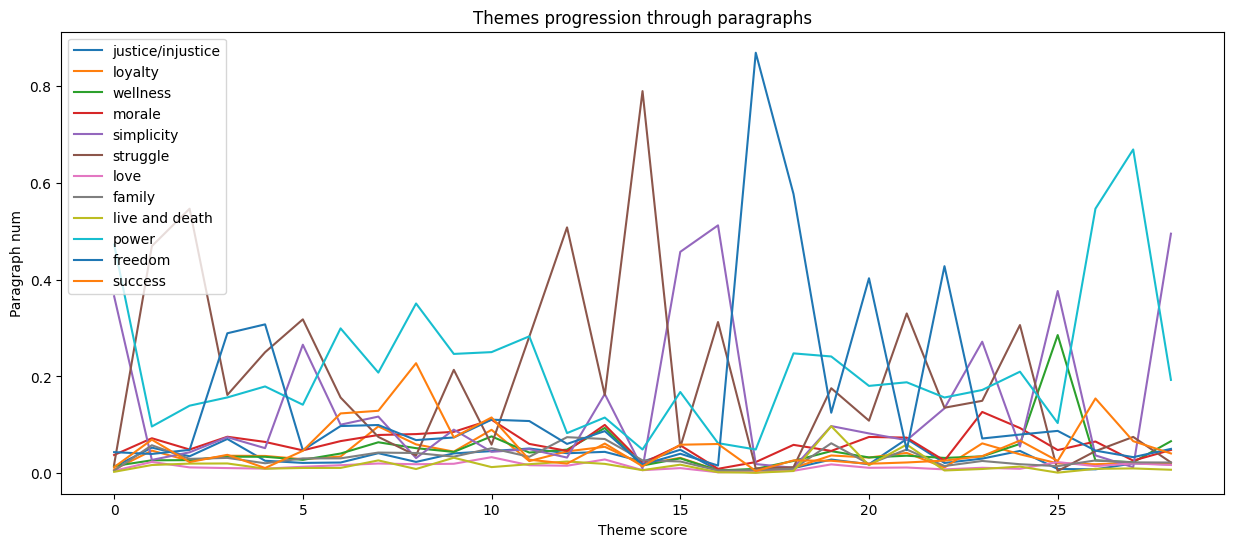

In [ ]:
plt.figure(figsize=(15,6))

for index, theme in enumerate(THEMES_LIST):
  plt.plot(
      range(len(paragraphs)),
      themes_scores[index][theme],
      label=theme
  )
plt.legend(loc="upper left")
plt.title("Themes progression through paragraphs")
plt.xlabel('Theme score')
plt.ylabel('Paragraph num')
plt.show()

<a name="kout-id"></a>

In [ ]:
nlp_report

{'title': 'I Want to Open a Window in Their Souls: Haruki Murakami on the Power of Writing Simply.',
 'url': 'https://www.theguardian.com/books/2022/nov/05/i-want-to-open-a-window-in-their-souls-haruki-murakami-on-the-power-of-writing-simply',
 'analysis': {'global': {'key_elements': ['spiritual void',
    'intelligence',
    'originality',
    'Beach Boys',
    'Hungary',
    'Olivetti typewriter',
    'Japanese',
    'Beatles',
    'diction',
    'spontaneous pleasure',
    'Originality',
    'emotional state',
    'natural impulse',
    'excess baggage',
    'jazz cafe',
    'improvisation',
    'prose',
    'footwork',
    'English composition',
    'grammatical structures',
    'information overload',
    'fountain pen',
    'creative expression',
    'unconstrained joy',
    'English syntax'],
   'themes': {'themes': ['freedom', 'power', 'morale'],
    'scires': [0.11629858613014221,
     0.09835407137870789,
     0.09653385728597641]}},
  'time_series': [{'paragraph': 0,
    'in

<a name="ki-id"></a>
In the above two cells, the output for this part of the task is outputted, including the plot and principal output.

## Insights

From the plot(theme progression on a paragraph basis), we can see how the author takes the lector from the introduction, to the conflict and finally the resolution, and how principal themes change with them. Also, we can see how in many places, all predefined themes score very low.

From the principal output, we can expand on our analysis. We can now determine the key themes in paragraphs, and how it relates to the key elements present.

As we can see, many of the key elements are also entities. But there are words and phrases that were not present in entities, or that were better captured. For example, *Olivietti typewritter* better express the entity than *Olivietti* alone.

<a name="red-id"></a>
## Recommendation System

In the next cell two models and a similarity function will be used:

**Summarization**: A summarization model will be used to reduce the length of the text. We will first summarize chunks of the text, diving it in an appropiate number of smaller pieces, and then summarize it again. Using this approach will prevent us from loosing important information, and will present the model with a smaller text, easier to summarize.

**Embeddings Extraction**: Another model will be used to transform this summary of summaries into a embeddings vector. Then, we can transform other summaries into a vector and compare both.

**Cosine Similarity**: The Cosine similarity will be used to determine the similarity between two embeddings vectors. If the second summary exceeds the length of the first one, it will be truncated. If the length is shorter, it will be padded with zeros.

A couple of mocked-up summaries will be provided to test the algorithm.

**Output**: The output format for this section will be a dictionary containing the following key-value pairs:

* **article_title**: article title.
* **article_url**: article URL.
* **summary**: generated summary for embeddings.
* **recommendations**: List of dict containing the following key-value pairs:
  * **summary**: summary of the articles to recommend.
  * **similarity**: results of the cosine similarity function.

In [ ]:
def summarize_text(
    target: str,
    base_model: str=SUMMARIZATION_MODEL,
    min_length=16,
    max_length=32,
    no_repeat_ngram_size=3,
):
  """
  Takes a string and a base model, and based on
  different parameters, it generates a summary.
  Returns the summary in string format.
  """
  tokenizer = AutoTokenizer.from_pretrained(base_model, return_tensors='pt')
  summarizer = pipeline(
      "summarization",
      model=base_model,
      tokenizer=tokenizer,
  )

  result = summarizer(
      target,
      min_length=min_length,
      max_length=max_length,
      no_repeat_ngram_size=no_repeat_ngram_size,
  )

  return result

In [ ]:
# Create an empty string to add paragraphs' summaries
paragraph_based_summary = ''
total_length = len(example)
# Calculate number of characters in each chunk
step = round(total_length / 6)
# Stablish starting indexes
starting_index = 0
ending_index = step
# Iterate while ending_index is still smaller than total_length
while ending_index <= total_length:
    chunk = example[starting_index:ending_index]
    summary = summarize_text(chunk)
    # Update indexes
    starting_index = starting_index + step - 300
    ending_index = ending_index + step - 300
    paragraph_based_summary += summary[0]['summary_text']

In [ ]:
final_summary = summarize_text(paragraph_based_summary, max_length=64)[0]['summary_text']

In [ ]:
final_summary

'Hear the Wind Sing is a new novel by Japanese writer Yayoi Kusama. The author was born and raised in Japan and struggled to express himself.'

In [ ]:
# Create embeddings
embedding_model = SentenceTransformer(EMBEDDINGS_MODEL)
embeddings = embedding_model.encode([final_summary])[0]

In [ ]:
def cosine_similarity(
    a: list,
    b: list,
):
  """
  Takes two vectors as input and returns cosine similarity
  """
  dot_product = np.dot(np.array(a),np.array(b))
  cosine = dot_product / (np.linalg.norm(a)*np.linalg.norm(b))

  return cosine

def padding_and_truncating(
    main: list,
    secondary: list,
):
  """
  Truncates or pads with zeros the secondary
  vector to match the length of main.
  Returns modified secondary vecor.
  """

  if len(secondary) < len(main):
    print('b')
    secondary += [0 for x in range(len(main) - len(secondary))]
  elif len(secondary) > len(main):
    print('c')
    secondary = secondary[:len(main)]
  else:
    pass

  return secondary

In [ ]:
mock_up_summaries = [
    'An old woman discovered that taking a glass of hot water made her feel better. She is 93 and keeps an active life.',
    'A group of musicians played an ancient Chinese song after 200 years. The music was reconstructed by experts.',
    'English writer was found guilty after writting about real individuals without their permission. He will have a financial penalty',
    'The author of short stories Kendall Johnson is now wirting his first novel. It will be published by the end of the year.'
]

In [ ]:
# Crete recommendation output
recommendation_results = {
    'article_title': title,
    'article_url': url,
    'article_summary': final_summary,
    'recommendations': [],
}
# Iterate over mocked-up summaries
for mock_up in mock_up_summaries:
  mocked_embeddings = embedding_model.encode([mock_up])[0]
  normalized_mocked_embeddings = padding_and_truncating(
      embeddings, mocked_embeddings
  )
  cosine = cosine_similarity(embeddings, normalized_mocked_embeddings)

  result = {
      'summary': mock_up,
      'similarity': cosine,
  }
  recommendation_results['recommendations'].append(result)

<a name="recout-id"></a>

In [ ]:
recommendation_results

{'article_title': 'I Want to Open a Window in Their Souls: Haruki Murakami on the Power of Writing Simply.',
 'article_url': 'https://www.theguardian.com/books/2022/nov/05/i-want-to-open-a-window-in-their-souls-haruki-murakami-on-the-power-of-writing-simply',
 'article_summary': 'Hear the Wind Sing is a new novel by Japanese writer Yayoi Kusama. The author was born and raised in Japan and struggled to express himself.',
 'recommendations': [{'summary': 'An old woman discovered that taking a glass of hot water made her feel better. She is 93 and keeps an active life.',
   'similarity': 0.054349776},
  {'summary': 'A group of musicians played an ancient Chinese song after 200 years. The music was reconstructed by experts.',
   'similarity': 0.260351},
  {'summary': 'English writer was found guilty after writting about real individuals without their permission. He will have a financial penalty',
   'similarity': 0.16991605},
  {'summary': 'The author of short stories Kendall Johnson is no

<a name="reci-id"></a>
In the above cell, the output for this part is displayed.

## Insights

The summary-of-summaries approach gave good results regarding the capture of the article's plot. The cosine similarity function performs well, and seems to be giving reasonable results.

<a name="sen-id"></a>
# Sentiment Analysis and Emotional Assessment

In the following cells, a Sentiment Analysis model will be used in conjunction with the generated summaries from the previous section:

**Sentiment Analysis**: The model will be fed with one paragraph at a time, generating the sentiment analysis for each paragraph. Then, the sentiment analysis model will be applied to the chunk-based summary of previous task. The summary-of-summaries will not be used since a lot of information isn't present.

**Output**: In this part, two outputs will be provided. A plot showing the sentiment analysis over paragraphs will help us to analyze it in a "time series" style. Then, the principal output will be provided as a dictionary containing the following key-value pairs:

* **global**: Dict with:
  * **positive**: Global score for positive sentiment.
  * **neutral**: Global score for neutral sentiment.
  * **negative**: Global score for negative sentiment.
* time_series: List with dicts:
  * **positive**: List of positive sentiment scores for each paragraph.
  * **neutral**: List of neutral sentiment scores for each paragraph.
  * **negative**: List of negative sentiment scores for each paragraph.

In [ ]:
def sentiment_analysis(
    target: str,
    base_model: str=SENTIMENT_ANALYSIS_MODEL,
    device=device,
):
  """
  Takes a string as input and returns sentiment analysis results
  """
  sentiment_analysis_model = pipeline(
    model=base_model,
    return_all_scores=True,
    device=device,
)
  result = sentiment_analysis_model(target)

  return result

In [ ]:
# Create sentiment analysis results
sentiment_analysis_results = {
    'global': None,
    'time_series': {
        'positive': [],
        'negative': [],
        'neutral': [],
    },
}
for paragraph in paragraphs:
  result = sentiment_analysis(paragraph)[0]
  positive = result[0]['score']
  neutral = result[1]['score']
  negative = result[2]['score']
  sentiment_analysis_results['time_series']['positive'].append(positive)
  sentiment_analysis_results['time_series']['neutral'].append(neutral)
  sentiment_analysis_results['time_series']['negative'].append(negative)

# Create global results based on paragraph-based summary
global_result = sentiment_analysis(paragraph_based_summary)
positive = result[0]['score']
neutral = result[1]['score']
negative = result[2]['score']

sentiment_analysis_results['global'] = {
    'positive': positive,
    'neutral': neutral,
    'negative': negative,
}

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:105: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


<a name="senplot-id"></a>

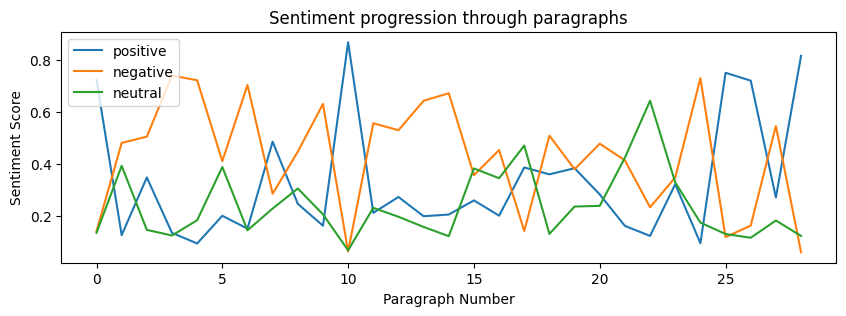

In [ ]:
plt.figure(figsize=(10,3))

for key in list(sentiment_analysis_results['time_series'].keys()):
  plt.plot(
      range(len(sentiment_analysis_results['time_series'][key])),
      sentiment_analysis_results['time_series'][key],
      label=key
  )
plt.legend(loc="upper left")
plt.title("Sentiment progression through paragraphs")
plt.xlabel('Paragraph Number')
plt.ylabel('Sentiment Score')
plt.show()

<a name="senout-id"></a>

In [ ]:
sentiment_analysis_results

{'global': {'positive': 0.8165794610977173,
  'neutral': 0.12315262109041214,
  'negative': 0.06026792526245117},
 'time_series': {'positive': [0.7236971259117126,
   0.12603938579559326,
   0.34821170568466187,
   0.13476403057575226,
   0.09395654499530792,
   0.2006380409002304,
   0.15097235143184662,
   0.48612073063850403,
   0.24665360152721405,
   0.16238079965114594,
   0.8690690994262695,
   0.21190713346004486,
   0.2729859948158264,
   0.1988198161125183,
   0.20536024868488312,
   0.2598492205142975,
   0.2009812742471695,
   0.38673752546310425,
   0.3602314591407776,
   0.3838455379009247,
   0.2828328311443329,
   0.16159392893314362,
   0.12299147993326187,
   0.3222285509109497,
   0.09513043612241745,
   0.7513781189918518,
   0.7210485339164734,
   0.2708991765975952,
   0.8165794610977173],
  'negative': [0.1411632001399994,
   0.48105481266975403,
   0.5054593682289124,
   0.7406113743782043,
   0.7224845886230469,
   0.4109823405742645,
   0.7044536471366882,
   

<a name="seni-id"></a>
In the above two cells, we can see both outputs, the plot and the principal output.

## Insights

As we can see from the plot, the article has positive and negative moments, leaning on the positive side to the end of the article. Overall, it also has a positive sentiment, even though some paragraphs might have a negative sentiment associated.

<a name="char-id"></a>
# Characters and Details Extraction

In the following cells we will be solving this part of the Task. For this, no new model will be used, since this information was already gathered during the first step of the Task.

Since characters are individuals, we can gather them through filtering the entities gathered first, using the **PER** NER tag. Details of the characters are stored under adjectives, words captured by POS analysis.

**Output**: The output format will be the same as entities.

<a name="charout-id"></a>

In [ ]:
# Create characters results
characters = [
    entity for entity in results
    if entity['ner_tag'] == 'PER'
]

characters

[{'entity': 'Haruki Murakami',
  'ner_tag': 'PER',
  'paragraphs': [0],
  'adjectives': []},
 {'entity': 'Ágota Kristóf',
  'ner_tag': 'PER',
  'paragraphs': [7],
  'adjectives': ['wonderful', 'similar']},
 {'entity': 'Kristóf',
  'ner_tag': 'PER',
  'paragraphs': [7],
  'adjectives': ['wonderful', 'similar', 'Hungarian']}]

<a name="chari-id"></a>
In the above cell, the output of this part is displayed.

## Insights

As we can see, the models doesn't perform completely as expected. *Kristof* and *Agata Kristof* are both the same entity, so additional steps should be taken to better capture the data.

Regarding the capture of more characters, some questions arise:
* How could specific information about the characters be gathered?
* Should we use ORG tag also to capture *The Beatles* and *The Beach Boys*? Could they be called characters?

<a name="q-id"></a>
# QA Generation

A combination of two models will be used to generate questions based on the article, and the corresponding answers:

* **Question Generation**: The model will take the full article divided in paragraphs and extract questions from those where key elements are present.
* **Question Answering**: The questions generated by the model will be answered by another model, and those Question-Answer pairs with high scored answers will be kept.

**Output**: The output of this step will be a list of dictionaries containing the following key-value pairs:
* **question**: Generated question
* **answer**: Generated answer
* **score**: Score associated with the answer.

In [ ]:
def question_generation(
    paragraphs: list=paragraphs,
    key_elements: list=key_elements,
    base_model_qg: str=QUESTION_GENERATION_MODEL,
    base_model_qa: str=QUESTION_ANSWERING_MODEL,
    answer_score_threshold: int=0.6,
    device=device,
):
  """
  Takes a list of paragraphs, key elements as innput,
  and using two models it generatates question-answer pairs.
  Returns list of dicts containing question-answer-score.
  """

  questions_and_answers = []

  tokenizer_qg = AutoTokenizer.from_pretrained(base_model_qg)
  model_qg = T5ForConditionalGeneration.from_pretrained(base_model_qg)
  question_generation_model = pipeline(
      "text2text-generation",
      model=base_model_qg,
      tokenizer=tokenizer_qg,
      device=device,
  )
  tokenizer_qa = AutoTokenizer.from_pretrained(base_model_qa)
  model_qa = AutoModelForQuestionAnswering.from_pretrained(base_model_qa)
  question_answering_model = pipeline(
      "question-answering",
      model=base_model_qa,
      tokenizer=tokenizer_qa,
      device=device,
  )
  # Stay with paragraphs that cntain a key element.
  for key_element in key_elements:
    key_element_paragraphs = [
        p for p in paragraphs
        if key_element in p
    ]
    # Iterate over selected paragraphs
    for paragraph in key_element_paragraphs:
      question = question_generation_model(paragraph)[0]
      # Stay with first question
      question = question['generated_text'].split('?')[0] + '?'
      qa_input = {
          'question': question,
          'context': paragraph
      }
      # Compute question's answer
      answer = question_answering_model(qa_input)

      if question not in [x['question'] for x in questions_and_answers]:
        # Stay only with question-answer pairs with higher than threshold score
        if answer['score'] >= answer_score_threshold:
          result = {
              'question': question,
              'answer': answer['answer'],
              'score': answer['score']
          }
          questions_and_answers.append(result)

  return questions_and_answers

In [ ]:
qas = question_generation()

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Some weights of the model checkpoint at ProfHuseyin/bert-english-fine-tuning-question-answering were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at ProfHuseyin/bert-english-fine-tuning-question-answering were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model 

<a name="qout-id"></a>

In [ ]:
qas

[{'question': 'What felt more like performing music than composing literature?',
  'answer': 'Writing in my new style',
  'score': 0.9414955377578735},
 {'question': 'What kind of impulse brings with it its own form and style?',
  'answer': 'pure',
  'score': 0.7196049690246582},
 {'question': 'What is at the heart of my novels?',
  'answer': 'free and natural sensibility',
  'score': 0.9743437767028809},
 {'question': 'What language did Kristof begin to write in?',
  'answer': 'French',
  'score': 0.9742255210876465},
 {'question': 'What did I do to make a fresh start?',
  'answer': 'ditch my stack of manuscript paper and my fountain pen',
  'score': 0.8089362382888794},
 {'question': 'What was my first novel called?',
  'answer': 'Hear the Wind Sing',
  'score': 0.9843606352806091},
 {'question': 'What is hard to define in words?',
  'answer': 'Originality',
  'score': 0.9980831742286682},
 {'question': 'What did I have a pretty clear idea of from the outset?',
  'answer': 'the novel

<a name="qi-id"></a>
In the above cell, the resulted output is printted.

## Insights

Even though the questions and answers are correct, some points can be highlighted:

* Many questions are asked in first person, while it should be in first. How can this be addressed to solve the problem?
* Some questions are obvious and don't reflect the true meaning of the text.

<a name="conclusion-id"></a>
# Conclusions & Next Steps

After solving the Task completely, and looking to the whole analysis, I think most of the relevant features, themes, and sentiments were captured. But there are some aspects that should be refined, including:
* Repeated entities,
* Entities that are present as other entity's adjective,
* Others don't seem to play a relevant part in the article,
* The truncation of the text, when needed, was performed on a paragraph-basis or character-basis. Could a token-based approach be better?
* Some questions are made using the first person instead of third.
* Could a paragraph/chunk - based analysis be used for other types of tasks?

After defining the answer to this questions, other steps should be taken:
* Code reformatting to match production needs. While many of the functionalities of the notebook are presented as functions, some part of the processes are outside defined functions.

I hope you enjoy reading this notebook as much as I enjoyed doing it.


